In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import os

In [4]:
import PIL

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras

In [7]:
from tensorflow.keras import layers

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
import pathlib

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [11]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228818944/228813984 [==============================] - 40s 0us/step


In [12]:
data_dir = pathlib.Path(data_dir)

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [14]:
print(image_count)

3670


In [15]:
roses = list(data_dir.glob('roses/*'))

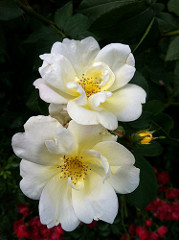

In [16]:
PIL.Image.open(str(roses[0]))

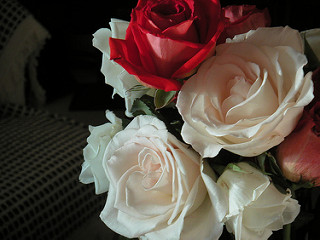

In [17]:
PIL.Image.open(str(roses[1]))

In [18]:
tulips = list(data_dir.glob('tulips/*'))

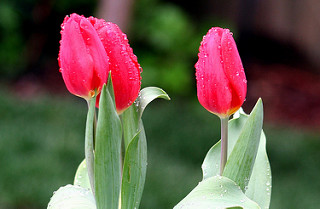

In [19]:
PIL.Image.open(str(tulips[0]))

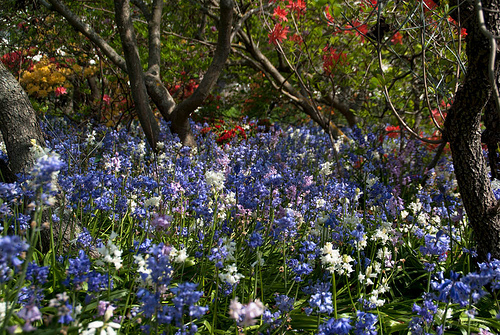

In [20]:
PIL.Image.open(str(tulips[1]))

In [22]:
batch_size = 32

In [23]:
img_height = 180

In [24]:
img_width = 180

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [27]:
class_names = train_ds.class_names

In [28]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [29]:
import matplotlib.pyplot as plt

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [37]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [39]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [40]:
image_batch, labels_batch = next(iter(normalized_ds))

In [41]:
first_image = image_batch[0]

In [42]:
print(np.min(first_image), np.max(first_image))

0.0 0.99921346


In [43]:
num_classes = 5

In [44]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [47]:
epochs=10

In [48]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 81s 885ms/step - loss: 1.3432 - accuracy: 0.4431 - val_loss: 1.1682 - val_accuracy: 0.5068
Epoch 2/10
92/92 [==============================] - 81s 881ms/step - loss: 0.9792 - accuracy: 0.6247 - val_loss: 0.9967 - val_accuracy: 0.5913
Epoch 3/10
92/92 [==============================] - 82s 889ms/step - loss: 0.8339 - accuracy: 0.6901 - val_loss: 1.0540 - val_accuracy: 0.5886
Epoch 4/10
92/92 [==============================] - 83s 905ms/step - loss: 0.6263 - accuracy: 0.7721 - val_loss: 1.0487 - val_accuracy: 0.6267
Epoch 5/10
92/92 [==============================] - 91s 991ms/step - loss: 0.4293 - accuracy: 0.8454 - val_loss: 1.0488 - val_accuracy: 0.6349
Epoch 6/10
92/92 [==============================] - 82s 896ms/step - loss: 0.2771 - accuracy: 0.9108 - val_loss: 1.0886 - val_accuracy: 0.6499
Epoch 7/10
92/92 [==============================] - 82s 891ms/step - loss: 0.1616 - accuracy: 0.9516 - val_loss: 1.4323 - val_accuracy: 0.6294

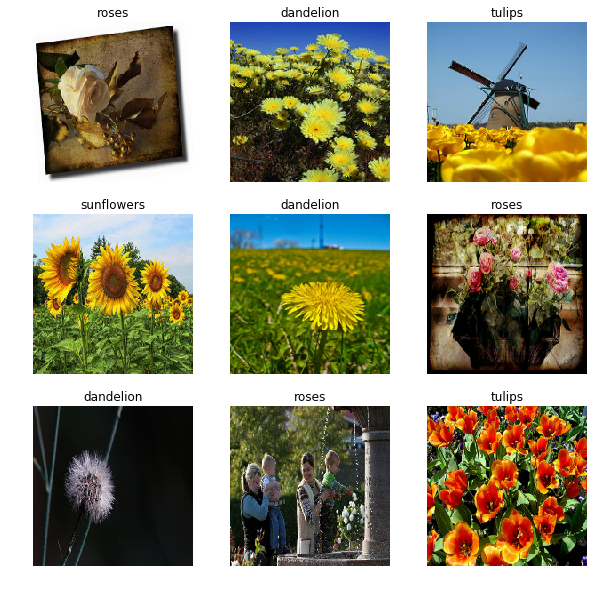

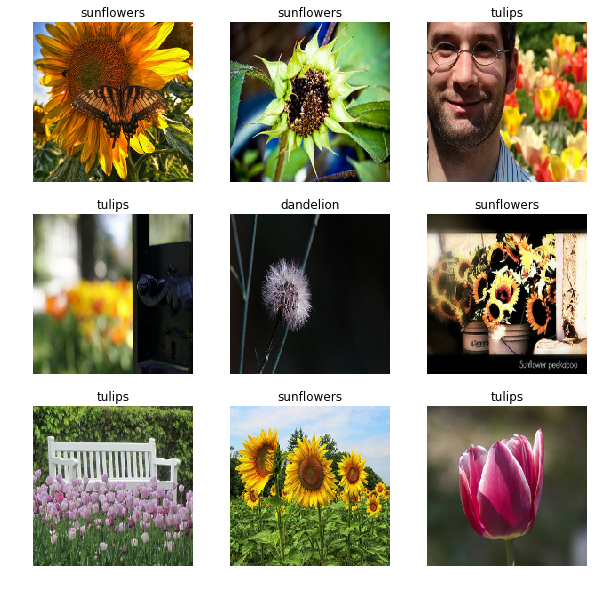

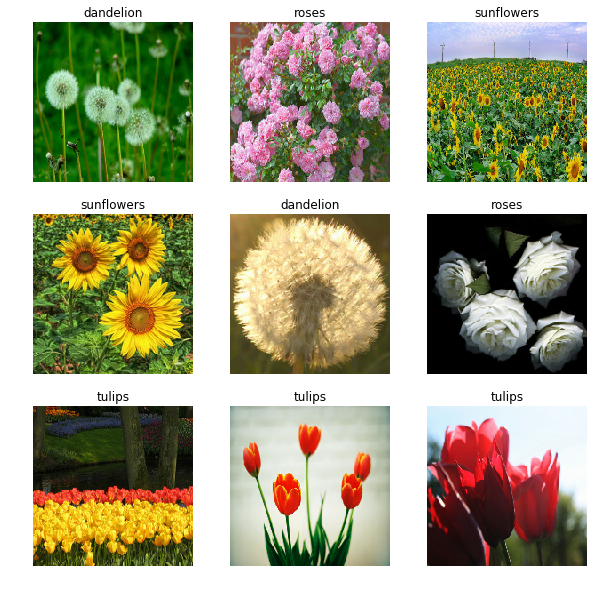

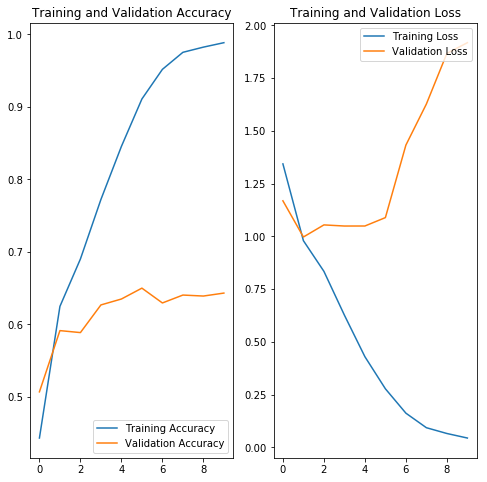

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [52]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [53]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [56]:
epochs = 15

In [57]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 113s 1s/step - loss: 1.3011 - accuracy: 0.4401 - val_loss: 1.1850 - val_accuracy: 0.4918
Epoch 2/15
92/92 [==============================] - 112s 1s/step - loss: 1.0197 - accuracy: 0.5937 - val_loss: 1.0631 - val_accuracy: 0.6104
Epoch 3/15
92/92 [==============================] - 114s 1s/step - loss: 0.9189 - accuracy: 0.6431 - val_loss: 0.9734 - val_accuracy: 0.6281
Epoch 4/15
92/92 [==============================] - 128s 1s/step - loss: 0.8566 - accuracy: 0.6723 - val_loss: 0.9161 - val_accuracy: 0.6471
Epoch 5/15
92/92 [==============================] - 112s 1s/step - loss: 0.8186 - accuracy: 0.6809 - val_loss: 0.8501 - val_accuracy: 0.6662
Epoch 6/15
92/92 [==============================] - 121s 1s/step - loss: 0.7896 - accuracy: 0.7006 - val_loss: 0.7891 - val_accuracy: 0.7016
Epoch 7/15
92/92 [==============================] - 117s 1s/step - loss: 0.7297 - accuracy: 0.7183 - val_loss: 0.9776 - val_accuracy: 0.6485
Epoch 8/15
92

In [58]:
acc = history.history['accuracy']

In [59]:
val_acc = history.history['val_accuracy']

In [60]:
loss = history.history['loss']

In [61]:
val_loss = history.history['val_loss']

In [62]:
epochs_range = range(epochs)

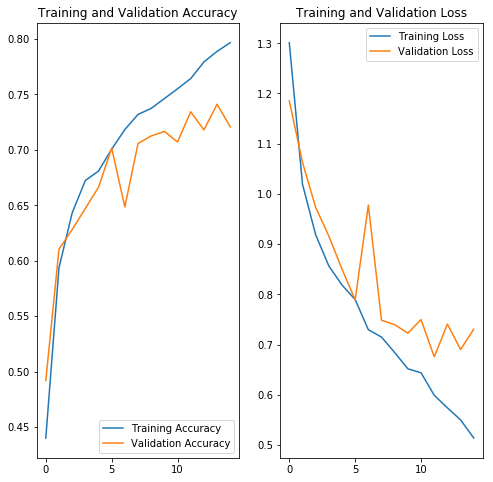

In [65]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

122880/117948 [===============================] - 0s 1us/step
This image most likely belongs to sunflowers with a 95.07 percent confidence.
